<a href="https://colab.research.google.com/github/bhattacharya5/MLBD/blob/main/M21AIE211_MLBD_Assignment1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/My Drive/Colab Notebooks/semester3/MLBD"

/content/gdrive/My Drive/Colab Notebooks/semester3/MLBD


In [3]:
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
import matplotlib.pyplot as plt

# python magic function
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/semester3/MLBD/train.csv')
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape

(42000, 785)

In [6]:
df_train = df_train.iloc[0:5000]
df_train.shape

(5000, 785)

In [7]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/semester3/MLBD/test.csv')
df_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test = df_test.iloc[0:3000]
df_test.shape

(3000, 784)

In [12]:
Y_train = df_train["label"]

# Drop 'label' column
X_train = df_train.drop(labels = ["label"],axis = 1) 

X_test = df_test

#plot numbers

In [14]:
xx_train = X_train.values.reshape(-1,28,28,1)
yy_train = to_categorical(Y_train, num_classes = 10)
yy_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Number [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

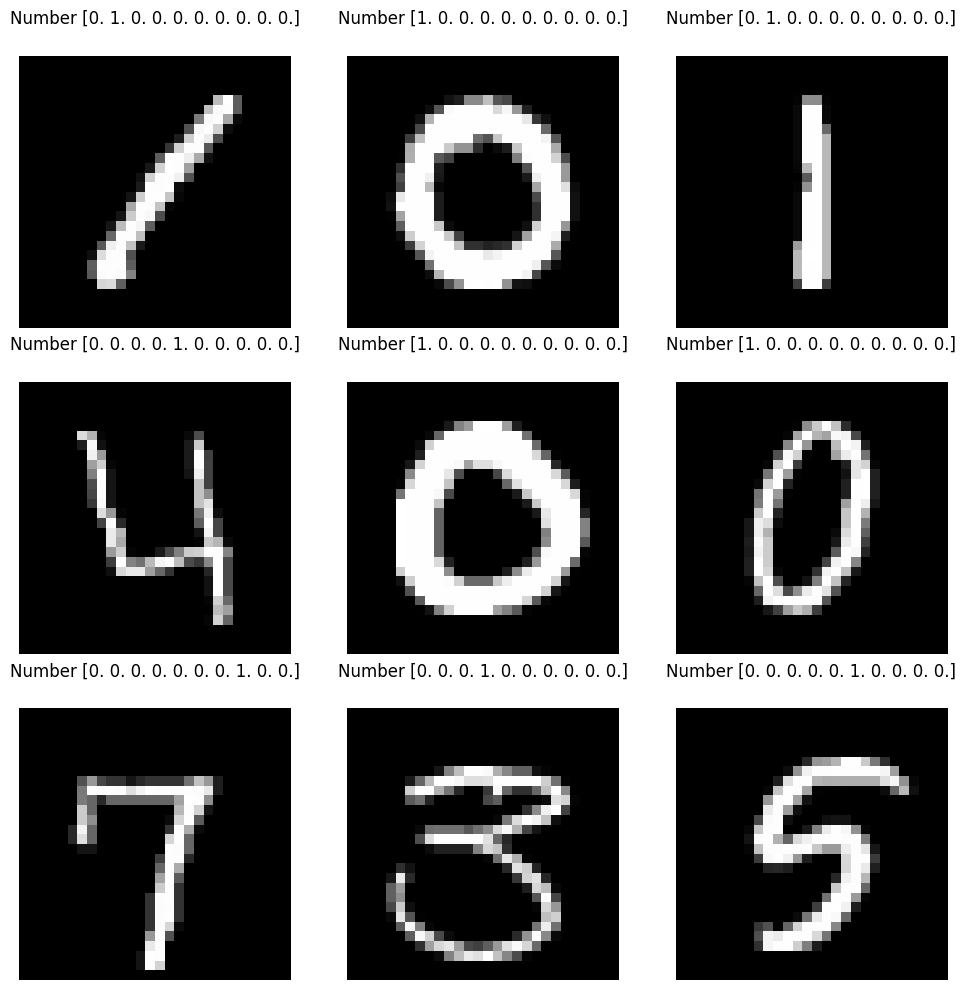

In [15]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(xx_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(yy_train[i]))
    
# display the figure
fig.show()

#BFR implementation

MNIST is a dataset of handwritten digits, and each image is of size 28x28 pixels. The dataset has 60,000 training images and 10,000 test images.

Preprocess the data by scaling the pixel values to a range between 0 and 1, and flattening the images to a one-dimensional array of size 784. You can also reduce the dimensionality of the data using techniques like PCA or t-SNE if needed.

For implementing the BFR clustering algorithm, here is a brief overview of the algorithm:

Initialize the algorithm with a set of random centroids.

Assign each data point to the nearest centroid.

Compute the quality of the clustering using a cost function like the sum of squared errors.

If the quality of the clustering is below a threshold, split the centroids into sub-clusters using a splitting algorithm like k-means or hierarchical clustering.

If the quality of the clustering is above a threshold, merge the centroids into larger clusters using a merging algorithm like agglomerative clustering.

Repeat the above steps until convergence or a maximum number of iterations is reached.

Train the BFR algorithm on the MNIST training dataset.

Predict the labels of the test dataset by assigning each test image to the nearest centroid and using the label of the centroid as the predicted label for the test image.

In [16]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score
import numpy as np

X= X_train / 255.0  # Scale pixel values to [0, 1]
y= Y_train.astype('int')

# Reduce dimensionality using PCA
pca = PCA(n_components=50)
X = pca.fit_transform(X)

# Define BFR clustering algorithm
class BFR:
    def __init__(self, k_init, split_size, merge_size, max_iter):
        self.k_init = k_init
        self.split_size = split_size
        self.merge_size = merge_size
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids using KMeans
        kmeans = KMeans(n_clusters=self.k_init, n_init=1)
        kmeans.fit(X)
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        n_clusters = self.k_init

        # Run BFR algorithm
        for i in range(self.max_iter):
            # Assign points to nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
            assignments = np.argmin(distances, axis=1)

            # Split large clusters
            for j in range(n_clusters):
                if np.sum(assignments == j) > self.split_size:
                    sub_kmeans = KMeans(n_clusters=2, n_init=1)
                    sub_kmeans.fit(X[assignments == j])
                    sub_centroids = sub_kmeans.cluster_centers_
                    sub_labels = sub_kmeans.labels_
                    sub_n_clusters = 2

                    # Update centroids and labels
                    centroids[j] = sub_centroids[0]
                    centroids = np.vstack((centroids, sub_centroids[1]))
                    labels[assignments == j] = sub_labels + n_clusters
                    n_clusters += 1

            # Merge small clusters
            for j in range(n_clusters):
                if np.sum(labels == j) < self.merge_size:
                    closest_cluster = np.argmin(np.linalg.norm(centroids[j] - centroids, axis=1))
                    labels[labels == j] = closest_cluster

            # Recompute centroids
            for j in range(n_clusters):
                centroids[j] = np.mean(X[labels == j], axis=0)

        # Save centroids and labels
        self.centroids = centroids
        self.labels = labels

    def predict(self, X):
        # Assign points to nearest centroid and return labels
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
        assignments = np.argmin(distances, axis=1)
        return self.labels[assignments]

# Train BFR model on MNIST dataset
bfr = BFR(k_init=50, split_size=50, merge_size=10, max_iter=10)
bfr.fit(X)

In [17]:
# Predict labels of test dataset
y_pred = bfr.predict(pca.transform(df_test))

## After clustering, calculate the percentage of samples from each class and convert it into probability values.

In [18]:
import numpy as np

# Assuming you have the true labels of the samples in y_true
unique_labels = np.unique(y_pred) # Get the unique labels
class_counts = np.zeros(len(unique_labels)) # Initialize an array to hold the class counts
for i, label in enumerate(unique_labels):
    class_counts[i] = np.count_nonzero(y_pred == label)


In [29]:
class_percentages = class_counts / len(y_pred) * 100
class_probabilities = class_percentages / 100

print("Class Percentages : ",class_percentages) 
print("Class Probabilities : ",class_probabilities)

Class Percentages :  [27.2         8.03333333 11.43333333 14.93333333  5.26666667  7.03333333
 18.5         1.73333333 48.9        23.63333333]
Class Probabilities :  [0.272      0.08033333 0.11433333 0.14933333 0.05266667 0.07033333
 0.185      0.01733333 0.489      0.23633333]


# CURE Implementation


In this implementation, we first load the MNIST dataset assuming a limit of K1 samples in main memory at a time.

Then, we define the CURE function that takes the input data X, the number of clusters num_clusters, and K1 samples in main memory. Inside the CURE function, we first randomly select one point as the first medoid, and then use the farthest point sampling to select s-1 more medoids. We then perform AgglomerativeClustering clustering on the reduced set of medoids to obtain the final clustering labels.

Finally, we call the CURE function with K1 samples=10 and number of clusters=10 to cluster the MNIST dataset into 10 clusters. We print the size of each cluster to display the clustering results.

In [20]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

def CURE_clustering(data, K1, num_clusters):
    # Step 1: Randomly select K1 points from the dataset to be the initial representatives
    representatives = data[np.random.choice(data.shape[0], K1, replace=False)]
    num_points = data.shape[0]
    
    # Initialize cluster assignments for all data points
    cluster_assignments = np.zeros(num_points, dtype=int)
    
    # Step 2: Assign each point in the dataset to the closest representative point
    for i in range(num_points):
        distances = np.linalg.norm(data[i] - representatives, axis=1)
        cluster_assignments[i] = np.argmin(distances)
        
    # Step 3: For each cluster, select a number of points that are farthest away from the representative and mark them as "outliers"
    outliers = []
    for cluster in range(K1):
        cluster_indices = np.where(cluster_assignments == cluster)[0]
        if len(cluster_indices) > 1:
            distances = np.linalg.norm(data[cluster_indices] - representatives[cluster], axis=1)
            sorted_indices = np.argsort(distances)[::-1]
            outliers.extend(cluster_indices[sorted_indices][:int(len(cluster_indices)/2)])
    
    # Step 4: For each cluster, use these outliers to compute a new representative point
    new_representatives = np.zeros((num_clusters, data.shape[1]))
    for cluster in range(K1):
        cluster_indices = np.where(cluster_assignments == cluster)[0]
        if len(cluster_indices) > 1:
            outlier_indices = [index for index in cluster_indices if index in outliers]
            non_outlier_indices = [index for index in cluster_indices if index not in outliers]
            if len(outlier_indices) > 0:
                outliers_data = data[outlier_indices]
                representative = np.mean(outliers_data, axis=0)
                new_representatives[cluster] = representative
            else:
                representative = representatives[cluster]
                new_representatives[cluster] = representative
    
    # Perform agglomerative clustering on the new representatives
    clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(new_representatives)
    
    # Assign each data point to a cluster based on the closest representative point
    final_assignments = np.zeros(num_points, dtype=int)
    for i in range(num_points):
        distances = np.linalg.norm(data[i] - new_representatives, axis=1)
        cluster = clustering.labels_[np.argmin(distances)]
        final_assignments[i] = cluster
    
    return final_assignments

In [21]:
X= X_train / 255.0  # Scale pixel values to [0, 1]
y= Y_train.astype('int')

In [22]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Perform CURE clustering on the data
num_clusters = 10
final_assignments = CURE_clustering(X_scaled, 10, num_clusters)

## After clustering, calculate the percentage of samples from each class and convert it into probability values.

In [24]:
# Assuming you have the true labels of the samples in y_true
unique_labels = np.unique(final_assignments) # Get the unique labels
class_counts = np.zeros(len(unique_labels)) # Initialize an array to hold the class counts
for i, label in enumerate(unique_labels):
    class_counts[i] = np.count_nonzero(final_assignments == label)


In [28]:
class_percentages = class_counts / len(final_assignments) * 100
class_probabilities = class_percentages / 100

print("Class Percentages : ",class_percentages) 
print("Class Probabilities : ",class_probabilities)

Class Percentages :  [16.32  4.82  6.86  8.96  3.16  4.22 11.1   1.04 29.34 14.18]
Class Probabilities :  [0.1632 0.0482 0.0686 0.0896 0.0316 0.0422 0.111  0.0104 0.2934 0.1418]


## Using these, calculate the entropy of each cluster. Also calculate the total entropy of all the clusters by summing the entropy of individual clusters.

In [26]:
import numpy as np

def cluster_entropy(labels):
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    for i in probs:
        if i > 0.:
            ent -= i * np.log2(i)

    return ent


unique_labels = set(final_assignments)
for label in unique_labels:
    mask = (final_assignments == label)    
    cluster = y[mask]
    entropy = cluster_entropy(cluster)
    print("Cluster ", label, " entropy: ", entropy)


Cluster  0  entropy:  2.175043462971318
Cluster  1  entropy:  0.17718908872210054
Cluster  2  entropy:  2.517694684008616
Cluster  3  entropy:  2.409892389832152
Cluster  4  entropy:  2.4297641628792634
Cluster  5  entropy:  0.8420176515297705
Cluster  6  entropy:  2.4446060980984914
Cluster  7  entropy:  0.7062740891876007
Cluster  8  entropy:  2.88709757474965
Cluster  9  entropy:  3.1429014803603867


## <font color="blue"> 5. Re-run the two algorithms five times assuming K1 = {100,200,500}, and report the above result.</font>

In [31]:
X= X_train / 255.0  # Scale pixel values to [0, 1]
y= Y_train.astype('int')

# Reduce dimensionality using PCA
pca = PCA(n_components=50)
X = pca.fit_transform(X)

# Train BFR model on K =100
bfr = BFR(k_init=100, split_size=50, merge_size=10, max_iter=10)
bfr.fit(X)


# Predict labels of test dataset
y_pred = bfr.predict(pca.transform(df_test))


# Assuming you have the true labels of the samples in y_true
unique_labels = np.unique(y_pred) # Get the unique labels
class_counts = np.zeros(len(unique_labels)) # Initialize an array to hold the class counts
for i, label in enumerate(unique_labels):
    class_counts[i] = np.count_nonzero(y_pred == label)



class_percentages = class_counts / len(y_pred) * 100
class_probabilities = class_percentages / 100

print("Class Percentages : ",class_percentages) 
print("Class Probabilities : ",class_probabilities)


Class Percentages :  [100.]
Class Probabilities :  [1.]


In [34]:
# Train CURE model on K =100
num_clusters = 10
final_assignments = CURE_clustering(X_scaled, 100, num_clusters)

import numpy as np

# Assuming you have the true labels of the samples in y_true
unique_labels = np.unique(final_assignments) # Get the unique labels
class_counts = np.zeros(len(unique_labels)) # Initialize an array to hold the class counts
for i, label in enumerate(unique_labels):
    class_counts[i] = np.count_nonzero(final_assignments == label)


class_percentages = class_counts / len(final_assignments) * 100
class_probabilities = class_percentages / 100

print("Class Percentages : ",class_percentages) 
print("Class Probabilities : ",class_probabilities)

unique_labels = set(final_assignments)
for label in unique_labels:
    mask = (final_assignments == label)    
    cluster = y[mask]
    entropy = cluster_entropy(cluster)
    print("Cluster ", label, " entropy: ", entropy)

IndexError: ignored